In [127]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

np.random.seed(123)
import env

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'




In [128]:
df_iris = sns.load_dataset('iris')
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [129]:
print(df_iris.shape)

(150, 5)


In [130]:
list(df.columns)

['passenger_id',
 'survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'deck',
 'embark_town',
 'alone']

In [131]:
df.dtypes

passenger_id      int64
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class            object
deck             object
embark_town      object
alone             int64
dtype: object

In [132]:
df.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [133]:
sheet_url = "https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357"

In [134]:
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [135]:
df_google = pd.read_csv(csv_export_url)

In [136]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [137]:
df_google.shape

(891, 12)

In [138]:

df_google.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [139]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [140]:
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [141]:
for col in df_google.columns:
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()}unique_values.')

Name has 891unique_values.
Sex has 2unique_values.
Ticket has 681unique_values.
Cabin has 147unique_values.
Embarked has 3unique_values.


In [142]:
df_google.Survived.value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

In [143]:
df_google.Pclass.value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [144]:
df_google.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [145]:
df_google.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

# excel

In [149]:
df_excel = pd.read_excel('train.xlsx', sheet_name='train')

FileNotFoundError: [Errno 2] No such file or directory: 'train.xlsx'

In [147]:
df_excel.info()

NameError: name 'df_excel' is not defined

In [ ]:
df_excel_sample = df_excel.head(100)

In [ ]:
df_excel_sample.shape

In [ ]:
df_excel.shape[0]

In [ ]:
df_excel.columns[:5]

In [ ]:
df_excel.select_dtypes(include='object').head()

In [ ]:
df_excel.select_dtypes(include='object').columns.tolist()

In [ ]:
df_excel.head(3)

In [ ]:
titanic_stats = df_excel[['Age', 'Fare']].describe().T
titanic_stats

In [ ]:
titanic_stats['range'] = titanic_stats['max'] - titanic_stats['min']
titanic_stats

In [ ]:

def get_titanic():
    my_query="SELECT * FROM passengers"
    df = pd.read_sql(my_query, get_connection('titanic_db'))
    return df
df = get_titanic()
df.head()

In [45]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1


In [41]:
columns_to_drop = ['embarked', 'class', 'passenger_id', 'deck']
df = df.drop(columns = columns_to_drop)

In [46]:

df.rename(columns ={ 'pclass':'pc'})

,survived,passengerCla,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Southampton,1
887,1,1,female,19.0,0,0,30.0000,Southampton,1
888,0,3,female,NaN,1,2,23.4500,Southampton,0
889,1,1,male,26.0,0,0,30.0000,Cherbourg,1


ValueError: Could not interpret input 'passengerCla'

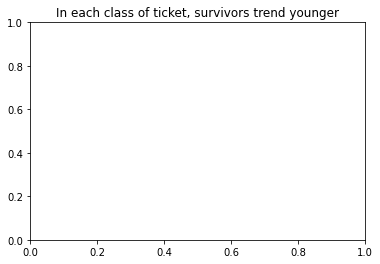

In [50]:

# At each class ticket, women have better survival rates
plt.title("In each class of ticket, survivors trend younger")
sns.boxplot(x='pc', y="age", hue="survived")
population_survival_rate = train.survived.mean()
plt.axhline(population_survival_rate)
plt.show()


In [159]:
def new_titanic_data():
   
    sql_query = 'SELECT * FROM passengers'
    

    df = pd.read_sql(sql_query, get_db_url('titanic_db'))
    
    return df

In [160]:
def get_titanic_data():
   
    if os.path.isfile('titanic_df.csv'):
        
       
        df = pd.read_csv('titanic_df.csv', index_col=0)
        
    else:
       
        df = new_titanic_data()
        
    
        df.to_csv('titanic_df.csv')
        
    return df

In [161]:
def new_iris_data():
  
    sql_query = """
                SELECT 
                    species_id,
                    species_name,
                    sepal_length,
                    sepal_width,
                    petal_length,
                    petal_width
                FROM measurements
                JOIN species USING(species_id)
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_db_url('iris_db'))
    
    return df

In [162]:
def get_iris_data():

    if os.path.isfile('iris_df.csv'):
        
        
        df = pd.read_csv('iris_df.csv', index_col=0)
        
    else:
        

        df = new_iris_data()
        
        
        df.to_csv('iris_df.csv')
        
    return df


In [163]:

def new_telco_data():
    sql_query = """
                select * from customers
                join contract_types using (contract_type_id)
                join internet_service_types using (internet_service_type_id)
                join payment_types using (payment_type_id)
                """
    
    
    df = pd.read_sql(sql_query, get_db_url('telco_churn'))
    
    return df

In [164]:
def get_telco_data():

    if os.path.isfile('telco.csv'):
        
        
        df = pd.read_csv('telco.csv', index_col=0)
        
    else:
    
        df = new_telco_data()
         
        df.to_csv('telco.csv')
        
    return df

In [169]:
import acquire

# import splitting functions
from sklearn.model_selection import train_test_split

In [180]:
def new_iris_data():
    '''
    This function reads the iris data from the Codeup db into a df.
    '''
    sql_query = """
                SELECT 
                    species_id,
                    species_name,
                    sepal_length,
                    sepal_width,
                    petal_length,
                    petal_width
                FROM measurements
                JOIN species USING(species_id)
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_db_url('iris_db'))
    
    return df

In [182]:
df.drop(columns=(species_id, measurement_id))

NameError: name 'species_id' is not defined